In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RMSD

rmsds were calculated with the rmsd.py script on a supercomputing cluster - see that script for details. Here's how I plotted them:

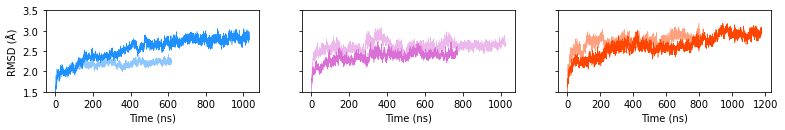

In [2]:
rmsds = np.load("data/rmsds.npy", allow_pickle=True)
colors = ['blue', 'skyblue', 'purple', 'darkorchid', 'orange', 'red']

fig,ax = plt.subplots(1,3,figsize=(13, 1.5), sharey=True)

# Note that I scale the rmsds by 10 to get them in Å rather than nm
#  and each time step is 0.15 ns
# Outward-open (S1a/b)
ax[0].plot(np.arange(0, len(rmsds[0])) * 0.15, rmsds[0]*10, c='dodgerblue', lw=0.5)
ax[0].plot(np.arange(0, len(rmsds[1])) * 0.15, rmsds[1]*10, c='dodgerblue', lw=0.5, alpha=0.5)

# Occluded (S2a/b)
ax[1].plot(np.arange(0, len(rmsds[2])) * 0.15, rmsds[2]*10, c='orchid', lw=0.5)
ax[1].plot(np.arange(0, len(rmsds[3])) * 0.15, rmsds[3]*10, c='orchid', lw=0.5, alpha=0.5)

# Inward-open (S3a/b)
ax[2].plot(np.arange(0, len(rmsds[4])) * 0.15, rmsds[4]*10, c='orangered', lw=0.5)
ax[2].plot(np.arange(0, len(rmsds[5])) * 0.15, rmsds[5]*10, c='orangered', lw=0.5, alpha=0.5)

ax[0].set_xlabel('Time (ns)'); ax[1].set_xlabel('Time (ns)'); ax[2].set_xlabel('Time (ns)')
ax[0].set_ylim(1.5,3.5); ax[1].set_ylim(1.5,3.5); ax[2].set_ylim(1.5,3.5)
ax[0].set_ylabel("RMSD (Å)")

plt.savefig("plots/rmsds.pdf", bbox_inches="tight")

# Distances

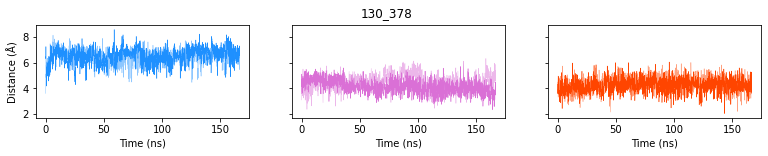

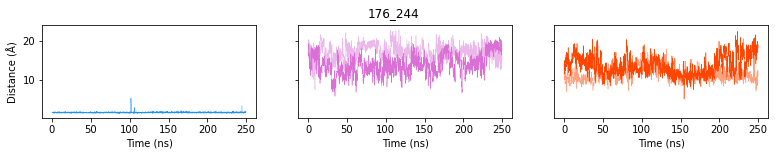

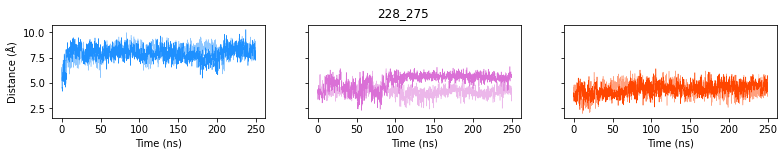

In [3]:
dists = {}

dists['130_378'] = pd.read_csv("data/distances/130_378_dist.csv", index_col=0)
dists['176_244'] = pd.read_csv("data/distances/176_244_dist.csv", index_col=0)
dists['228_275'] = pd.read_csv("data/distances/228_275_dist.csv", index_col=0)

for pair, dists in dists.items():
    
    fig,ax = plt.subplots(1,3,figsize=(13, 1.7), sharey=True)
    
    ax[0].plot(dists['time'], dists['S1a'], c='dodgerblue', lw=0.5)
    ax[0].plot(dists['time'], dists['S1b'], c='dodgerblue', lw=0.5, alpha=0.5)
    ax[1].plot(dists['time'], dists['S2a'], c='orchid', lw=0.5)
    ax[1].plot(dists['time'], dists['S2b'], c='orchid', lw=0.5, alpha=0.5)
    ax[2].plot(dists['time'], dists['S3a'], c='orangered', lw=0.5)
    ax[2].plot(dists['time'], dists['S3b'], c='orangered', lw=0.5, alpha=0.5)
    
    ax[0].set_xlabel('Time (ns)'); ax[1].set_xlabel('Time (ns)'); ax[2].set_xlabel('Time (ns)')
    ax[0].set_ylabel("Distance (Å)")
    
    fig.suptitle(pair, y=1.03)

# H232 dihedrals

To generate the dihedrals from raw md files, I did the following on our supercomputing cluster for each trajectory:

#### Import

`
import pandas as pd
import mdtraj as md
`


#### Load in the trajectory

`
traj = md.load(path_to_traj.dcd, top=path_to_system.pdb)
traj_protein = traj.restrict_atoms(traj.topology.select("protein"))
`

#### Load in the dihedral table (provided)

`
dihtable=pd.read_csv("dihtable.csv", index_col=0)
`

#### Calculate dihedrals
Using the CalcDihedrals function from mdtools (easiest if that file is simply in the same directory)

`
from mdtools import CalcDihedrals
dihedrals = CalcDihedrals(traj_protein, 'HIS232', dihtable, min_jumps=True, unit='deg')
`

I then saved these so you can have them here. Load them in:

In [4]:
h232_s1a = np.loadtxt("data/dihedrals/h232_dihedrals_S1a.txt")
h232_s1b = np.loadtxt("data/dihedrals/h232_dihedrals_S1b.txt")
h232_s2a = np.loadtxt("data/dihedrals/h232_dihedrals_S2a.txt")
h232_s2b = np.loadtxt("data/dihedrals/h232_dihedrals_S2b.txt")
h232_s3a = np.loadtxt("data/dihedrals/h232_dihedrals_S3a.txt")
h232_s3b = np.loadtxt("data/dihedrals/h232_dihedrals_S3b.txt")

### Plot dihedrals:

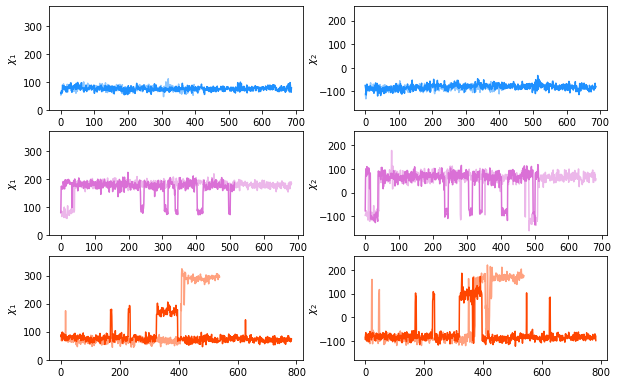

In [5]:
fig,ax = plt.subplots(3, 2, figsize=(10,6.5))
plt.rcParams['pdf.fonttype'] = 'truetype'

ax[(0,0)].plot(h232_s1a[:,0], c='dodgerblue')
ax[(0,0)].plot(h232_s1b[:,0], c='dodgerblue', alpha=0.5)
ax[(0,0)].set_ylim(0, 370)

ax[(0,1)].plot(h232_s1a[:,1] - 360, c='dodgerblue')
ax[(0,1)].plot(h232_s1b[:,1] - 360, c='dodgerblue', alpha=0.5)
ax[(0,1)].set_ylim(-180, 260)

ax[(1,0)].plot(h232_s2a[:,0], c='orchid')
ax[(1,0)].plot(h232_s2b[:,0], c='orchid', alpha=0.5)
ax[(1,0)].set_ylim(0, 370)

ax[(1,1)].plot(h232_s2a[:,1], c='orchid')
ax[(1,1)].plot(h232_s2b[:,1], c='orchid', alpha=0.5)
ax[(1,1)].set_ylim(-180, 260)

ax[(2,0)].plot(h232_s3a[:,0], c='orangered')
ax[(2,0)].plot(h232_s3b[:,0], c='orangered', alpha=0.5)
ax[(2,0)].set_ylim(0, 370)

# For simulation 3, I need to add or subtract 360 to match the others
#  (doesn't change the data, just the "phase")
h232_s3b_adj = []; h232_s3a_adj = []

for i in h232_s3b[:,1]:
    if i < -120:
        i += 360
    h232_s3b_adj.append(i)
        
for i in h232_s3a[:,1]:
    if i > 220:
        i -= 360
    h232_s3a_adj.append(i)

ax[(2,1)].plot(h232_s3a_adj, c='orangered')
ax[(2,1)].plot(h232_s3b_adj, c='orangered', alpha=0.5)
ax[(2,1)].set_ylim(-180, 260)

ax[0,0].set_ylabel('$\chi_1$')
ax[1,0].set_ylabel('$\chi_1$')
ax[2,0].set_ylabel('$\chi_1$')

ax[0,1].set_ylabel('$\chi_2$', labelpad=-1)
ax[1,1].set_ylabel('$\chi_2$', labelpad=-1)
ax[2,1].set_ylabel('$\chi_2$', labelpad=-1)

plt.savefig("plots/dihedral_plot.pdf", bbox_inches="tight")

In [6]:
from mdtools import AcceleratedSpectralClustering

In [7]:
all_dihedrals = np.concatenate([h232_s1a, h232_s1b, h232_s2a, h232_s2b, h232_s3a, h232_s3b])

# Map to spherical coordinates
X = np.array([np.cos(all_dihedrals[:,0] * 2 * np.pi / 360) * np.sin(all_dihedrals[:,1] * 2 * np.pi / 360), 
              np.sin(all_dihedrals[:,0] * 2 * np.pi / 360) * np.sin(all_dihedrals[:,1] * 2 * np.pi / 360),
              np.cos(all_dihedrals[:,1] * 2 * np.pi / 360)])

# You don't really need to do the accelerated spectral clustering algorithm here because there aren't *that*
#  many data points, but - eh - it doesn't hurt
labels_ = AcceleratedSpectralClustering(X.T, 3, 1000)

Calculating weights per point...
Performing spectral clustering...
Assigning nearest neighbors...


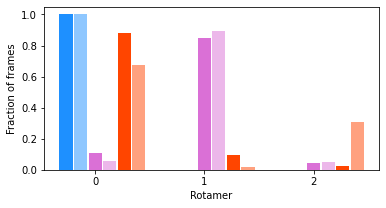

In [8]:
plt.figure(figsize=(6,3))

# Map each frame in the concatenated data back to whichever trajectory it was originally from
traj_mapper = np.concatenate([np.zeros(len(h232_s1a)),
                    np.ones(len(h232_s1b)), 
                    np.ones(len(h232_s2a))*2, 
                    np.ones(len(h232_s2b))*3, 
                    np.ones(len(h232_s3a))*4, 
                    np.ones(len(h232_s3b))*5])

# colors and transparencies
colors = ['dodgerblue', 'dodgerblue', 'orchid', 'orchid', 'orangered', 'orangered']
alphas = [1, 0.5, 1, 0.5, 1, 0.5]

for k in range(6):
    plt.bar(0 - 0.4 + 0.2*k, np.mean(labels_[traj_mapper==k]==0), width=0.18, color=colors[k], alpha=alphas[k])
    
for k in range(6):
    plt.bar(1.5 - 0.4 + 0.2*k, np.mean(labels_[traj_mapper==k]==1), width=0.18, color=colors[k], alpha=alphas[k])
    
for k in range(6):
    plt.bar(3 - 0.4 + 0.2*k, np.mean(labels_[traj_mapper==k]==2), width=0.18, color=colors[k], alpha=alphas[k])
    
plt.xticks([0, 1.5, 3], np.arange(3))
plt.xlabel('Rotamer')
    
plt.ylabel('Fraction of frames')

plt.savefig("plots/H232_rotamer_clusters.pdf", bbox_inches="tight")